# **Customer Churn Prediction Notebook**

This notebook presents an analysis of a customer churn dataset and explores various machine learning models to predict customer churn. The goal is to identify factors contributing to churn and build accurate predictive models.

The notebook is structured as follows:

*   **Exploratory Data Analysis (EDA)**:
    *   **What was done**: Loaded the dataset, displayed concise summaries, viewed the first few rows, examined column names, and generated descriptive statistics for numerical features. Frequency distributions for categorical columns were also analyzed.
    *   **Techniques used**: pandas for data manipulation, descriptive statistics (`.info()`, `.head()`, `.columns`, `.describe()`, `.value_counts()`), matplotlib and seaborn for basic visualizations (histograms, box plots, density plots).

*   **Data Preprocessing**:
    *   **What was done**: Separated numerical and categorical columns, plotted a correlation matrix for numerical features, dropped a feature ('Frequency of use') due to multicollinearity, scaled numerical features, created dummy variables for categorical features, and concatenated the processed features into a final DataFrame.
    *   **Techniques used**: pandas for data manipulation, seaborn for heatmap visualization, StandardScaler for feature scaling, and `pd.get_dummies()` for one-hot encoding.

*   **Model Training and Evaluation**:
    *   **What was done**: Trained and evaluated three classification models: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. Cross-validation was performed on the Decision Tree model. The optimal number of trees for the Random Forest was investigated using the Out-of-Bag (OOB) sampling method. A Gradient Boosting Classifier was also trained and evaluated.
    *   **Algorithms used**: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier.
    *   **Optimization Techniques**: Out-of-Bag (OOB) sampling for tuning `n_estimators` in Random Forest. Cross-validation (`cross_val_score`) for robust evaluation of the Decision Tree model.
    *   **Evaluation Metrics**: Accuracy score and Classification Report (precision, recall, f1-score, support) were used to evaluate model performance. Feature importance was also analyzed for the Decision Tree model.

This notebook provides a comprehensive example of a typical machine learning workflow for a classification task, including data exploration, preprocessing, model selection, training, and evaluation.

#### **Loading Libraries and Dataset**

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced visualizations
%matplotlib inline

In [68]:
# Load the dataset into a pandas DataFrame
churndf = pd.read_csv("Dataset Customer Churn.csv")

#### **Exploratory Data Analytics**

In [69]:
# Display concise summary of the DataFrame
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [70]:
# Display the first 3 rows of the DataFrame
churndf.head(3)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0


In [71]:
# Display the column names of the DataFrame
churndf.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [72]:
# Display descriptive statistics for selected numerical columns
churndf[['Call  Failure','Seconds of Use','Customer Value']].describe()

,Call Failure,Seconds of Use,Customer Value
count,3150.000000,3150.000000,3150.000000
mean,7.627937,4472.459683,470.972916
std,7.263886,4197.908687,517.015433
min,0.000000,0.000000,0.000000
25%,1.000000,1391.250000,113.801250
50%,6.000000,2990.000000,228.480000
75%,12.000000,6478.250000,788.388750
max,36.000000,17090.000000,2165.280000


In [73]:
# Display the frequency distribution of categorical columns
for col in ['Churn','Status','Complains','Tariff Plan']:
    freq = churndf[col].value_counts()
    print(f"Frequency distribution for column: {col}") # Add f-string for better output
    print(freq)
    print("-" * 20) # Add separator for readability

Frequency distribution for column: Churn
Churn
0    2655
1     495
Name: count, dtype: int64
--------------------
Frequency distribution for column: Status
Status
1    2368
2     782
Name: count, dtype: int64
--------------------
Frequency distribution for column: Complains
Complains
0    2909
1     241
Name: count, dtype: int64
--------------------
Frequency distribution for column: Tariff Plan
Tariff Plan
1    2905
2     245
Name: count, dtype: int64
--------------------


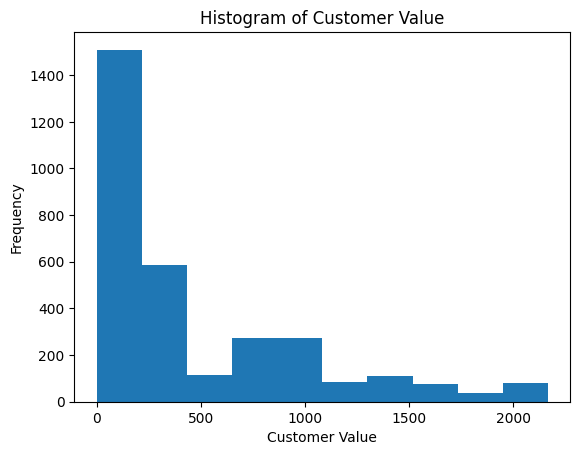

In [74]:
# Plot a histogram of 'Customer Value'
churndf['Customer Value'].plot(kind="hist")
plt.title("Histogram of Customer Value") # Add title
plt.xlabel("Customer Value") # Add x-label
plt.ylabel("Frequency") # Add y-label
plt.show()

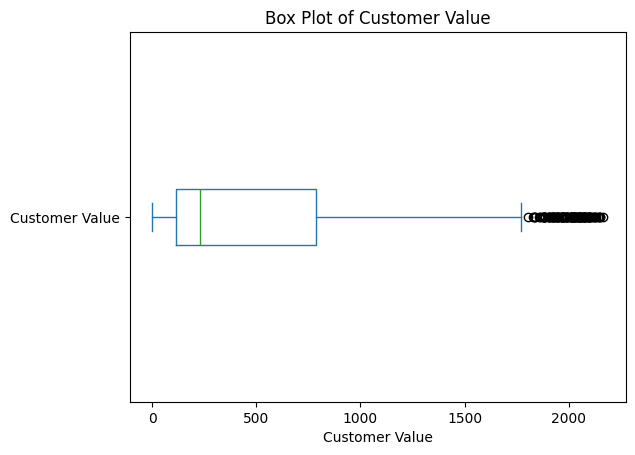

In [75]:
# Plot a box plot of 'Customer Value'
churndf['Customer Value'].plot(kind="box", vert=False)
plt.title("Box Plot of Customer Value") # Add title
plt.xlabel("Customer Value") # Add x-label
plt.show()

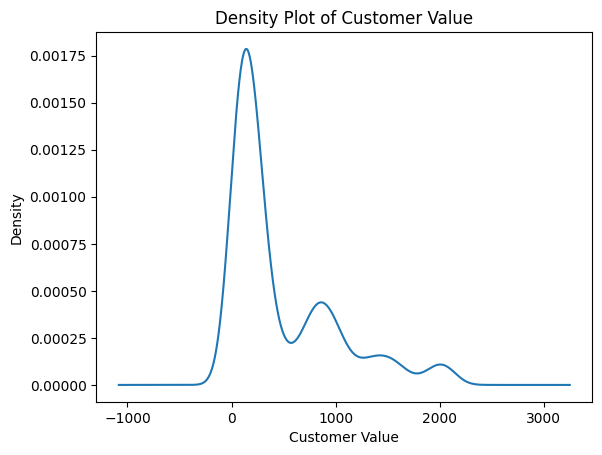

In [76]:
# Plot a density plot of 'Customer Value'
churndf['Customer Value'].plot(kind="density")
plt.title("Density Plot of Customer Value") # Add title
plt.xlabel("Customer Value") # Add x-label
plt.show()

#### **Data Preprocessing**

In [77]:
# Split Data into numeric and categorical columns
numcols = churndf[['Call  Failure','Subscription  Length','Seconds of Use',
                 'Frequency of use', 'Frequency of SMS','Distinct Called Numbers',
                 'Age','Customer Value']]

objcols = churndf[['Complains','Age Group','Charge  Amount','Tariff Plan', 'Status',
                 'Churn']]

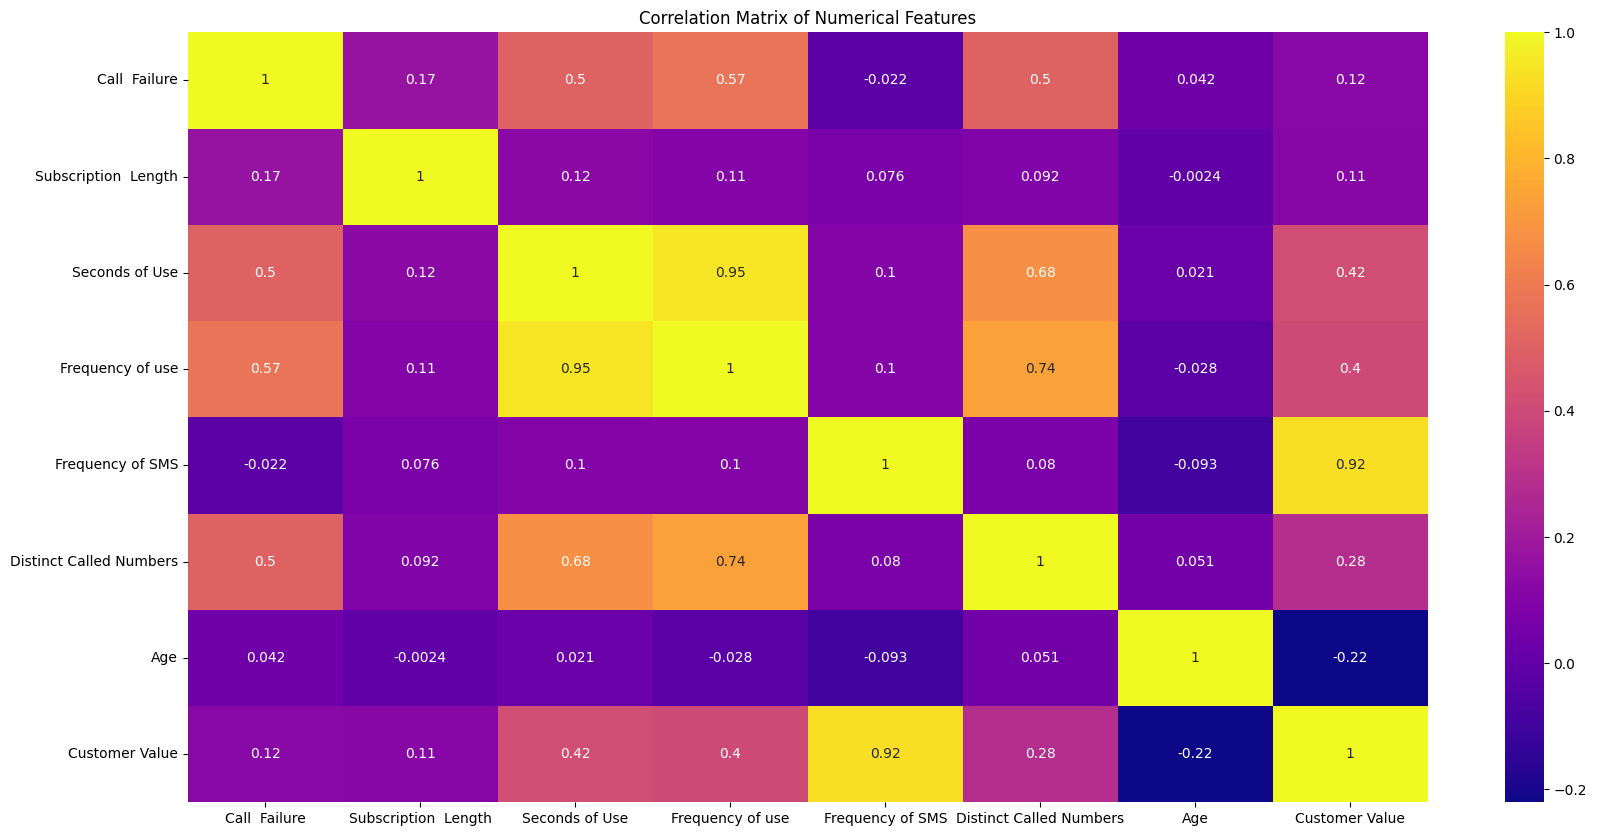

In [78]:
# Plot a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20,10))
sns.heatmap(numcols.corr(), annot=True, cmap="plasma")
plt.title("Correlation Matrix of Numerical Features") # Add title
plt.show()

In [79]:
# Drop 'Frequency of use' due to multicollinearity
numcols = numcols.drop('Frequency of use', axis=1)

In [80]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [81]:
# Scale the numerical columns
scaler = StandardScaler() # Initialize the scaler
numcols_scaled = scaler.fit_transform(numcols)

In [82]:
# Convert the scaled numerical data back to a DataFrame
numcols_scaled = pd.DataFrame(numcols_scaled, columns=numcols.columns)

In [83]:
# Display the first 2 rows of the scaled numerical DataFrame
display(numcols_scaled.head(2)) # Use display() for better formatting

,Call Failure,Subscription Length,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value
0,0.051229,0.636726,-0.024411,-0.607513,-0.378158,-0.113074,-0.528759
1,-1.050285,0.753384,-0.989807,-0.589691,-1.133331,-0.679346,-0.822036


In [84]:
# Create dummy variables for categorical columns
objcols_dummy = pd.get_dummies(objcols, columns=['Complains', 'Age Group', 'Charge  Amount',
                                              'Tariff Plan', 'Status'])

In [85]:
# Concatenate the scaled numerical and dummy encoded categorical DataFrames
churndf_final = pd.concat([numcols_scaled, objcols_dummy], axis=1)

In [86]:
# Display the first 3 rows of the final DataFrame
display(churndf_final.head(3)) # Use display() for better formatting

,Call Failure,Subscription Length,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Churn,Complains_0,Complains_1,...,Charge Amount_5,Charge Amount_6,Charge Amount_7,Charge Amount_8,Charge Amount_9,Charge Amount_10,Tariff Plan_1,Tariff Plan_2,Status_1,Status_2
0,0.051229,0.636726,-0.024411,-0.607513,-0.378158,-0.113074,-0.528759,0,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-1.050285,0.753384,-0.989807,-0.589691,-1.133331,-0.679346,-0.822036,0,True,False,...,False,False,False,False,False,False,True,False,False,True
2,0.326608,0.520069,-0.481140,2.547012,0.028473,-0.113074,2.061285,0,True,False,...,False,False,False,False,False,False,True,False,True,False


In [87]:
# Define features (X) and target (y)
y = churndf.Churn
X = churndf_final.drop('Churn', axis=1)

#### **Model Training For Logistic Regression**

In [88]:
# Import and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression().fit(X, y)

In [89]:
# Evaluate the Logistic Regression model's accuracy on the training data
print("Logistic Regression Model Accuracy:")
print(logisticmodel.score(X, y))

Logistic Regression Model Accuracy:
0.8901587301587301


In [90]:
# Make predictions using the Logistic Regression model
logistic_predict = logisticmodel.predict(X)

In [91]:
# Import classification_report for model evaluation
from sklearn.metrics import classification_report

#### **Model Training for Decision Tree Classifier**

In [92]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Train the Decision Tree Classifier model
treemodel = DecisionTreeClassifier(random_state=42).fit(X, y) # Added random_state for reproducibility

In [94]:
# Evaluate the Decision Tree Classifier model's accuracy on the training data
print("Decision Tree Classifier Model Accuracy:")
print(treemodel.score(X, y))

Decision Tree Classifier Model Accuracy:
0.9920634920634921


In [95]:
# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

In [96]:
# Perform cross-validation on the Decision Tree Classifier model
print("Cross-validation scores for Decision Tree Classifier:")
print(cross_val_score(treemodel, X, y, cv=5)) # Using 5 folds for cross-validation

Cross-validation scores for Decision Tree Classifier:
[0.95079365 0.94603175 0.91587302 0.93650794 0.91746032]


In [97]:
# Make predictions using the Decision Tree Classifier model
tree_predict = treemodel.predict(X)

#### **Classification Report for Decision Tree Classifier**

In [98]:
# Print the classification report for the Decision Tree Classifier
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y, tree_predict))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2655
           1       0.98      0.97      0.97       495

    accuracy                           0.99      3150
   macro avg       0.99      0.98      0.98      3150
weighted avg       0.99      0.99      0.99      3150



#### **Classification Report for Logistic Regression**

In [99]:
# Print the classification report for the Logistic Regression model
print("Classification Report for Logistic Regression:")
print(classification_report(y, logistic_predict))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2655
           1       0.76      0.44      0.56       495

    accuracy                           0.89      3150
   macro avg       0.83      0.71      0.75      3150
weighted avg       0.88      0.89      0.88      3150



#### **Listing features in ascending order of importance**

In [100]:
# Display feature importances from the Decision Tree Classifier
print("Feature Importances (Decision Tree Classifier):")
# Create a DataFrame for feature importances and sort by importance
feature_importances = pd.DataFrame(treemodel.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
display(feature_importances) # Use display() for better formatting

Feature Importances (Decision Tree Classifier):


,Importance
Complains_1,0.293463
Seconds of Use,0.190957
Status_1,0.139223
Subscription Length,0.099704
Distinct Called Numbers,0.093076
Call Failure,0.061903
Customer Value,0.054555
Frequency of SMS,0.034342
Age Group_4,0.015915
Age Group_2,0.008843


#### **Model Training for Random Forest Classifier**

In [101]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Train the Random Forest Classifier model
RFmodel = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42, n_jobs=-1) # Added random_state for reproducibility and n_jobs for parallel processing
RFmodel.fit(X, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=42)

In [103]:
# Evaluate the Random Forest model's accuracy on the training data using the OOB score
print("Random Forest Model OOB Accuracy:")
print(RFmodel.oob_score_) # Use .oob_score_ for OOB accuracy

Random Forest Model OOB Accuracy:
0.953968253968254


In [104]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

#### **Finding optimal no. of trees using OOB Sampling Method**

In [105]:
# Find Optimal Number of Trees using Out of Bag Sample Method
oob_errors = []
n_trees = np.arange(1, 101) # Include 100 for plotting
for n in n_trees:
    # Initialize and train RandomForestClassifier with oob_score enabled
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, bootstrap=True, n_jobs=-1, random_state=42) # Added n_jobs=-1 for parallel processing and random_state
    rf.fit(X, y)
    # Calculate OOB error (1 - OOB accuracy)
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)

# Note: This loop might take some time to run

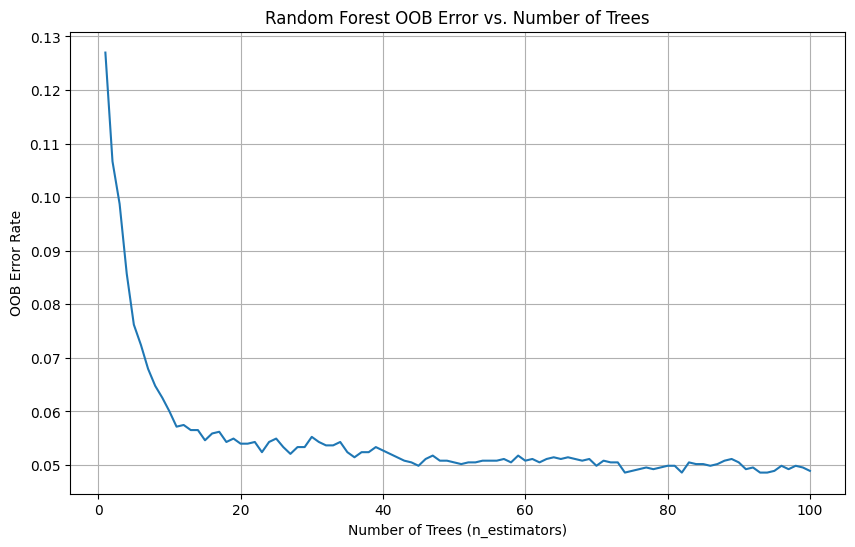

In [106]:
# Plot the OOB error vs. number of trees
plt.figure(figsize=(10, 6)) # Adjust figure size
plt.plot(n_trees, oob_errors)
plt.xlabel("Number of Trees (n_estimators)") # Add x-label
plt.ylabel("OOB Error Rate") # Add y-label
plt.title("Random Forest OOB Error vs. Number of Trees") # Add title
plt.grid(True) # Add grid
plt.show()

In [107]:
# Calculate the mean of the OOB errors
print("Mean OOB error:", np.mean(oob_errors))

Mean OOB error: 0.05463809523809524


#### **Model Training and Prediction Using Gradient Boosting Method**

In [108]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
# Train the Gradient Boosting Classifier model
gbm = GradientBoostingClassifier(n_estimators=1000, random_state=42) # Added random_state for reproducibility
gbm.fit(X, y)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [110]:
# Evaluate the Gradient Boosting Classifier model's accuracy on the training data
print("Gradient Boosting Classifier Model Accuracy:")
print(gbm.score(X, y))

Gradient Boosting Classifier Model Accuracy:
0.9920634920634921
